Selection des données

In [90]:
import pandas as pd

df1 = pd.read_csv('datasets/fires.csv', header=0)
df2 = pd.read_csv('datasets/formatted-weather2.csv', header=0, usecols=['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall'])


[1251.2 1581.   641.2 3333.8  948.4 2006.8 2207.4 2131.2 1418.4 1235.
 2222.4 1994.2  971.2 1998.  2594.4 1175.6 1335.  2010.  1035.4  893.8
 1061.7  963.2 1121.4  400.6  354.4 1899.  1152.  1481.8 1888.  3011.4
 2603.  1850.   998.2 1413.   744.3  245.4 1803.7 2365.  1051.7 1319.
 1364.2  716.8 1987.8 1014.8 1433.1  331.2 2803.8  815.6  176. ]
146.92
150.73
145.84
153.11
149.85
151.75
151.57
167.95
150.71
145.0
151.21
151.18
147.36
144.9
150.89
149.13
149.09
148.77
143.85
144.28
147.07
144.84
144.95
142.14
141.65
141.6
145.08
141.28
153.02
145.77
153.4
146.82
138.6
140.78
138.99
136.82
117.88
115.1
116.01
115.96
115.86
121.64
116.73
147.32
147.16
133.88
130.84
132.26
131.02


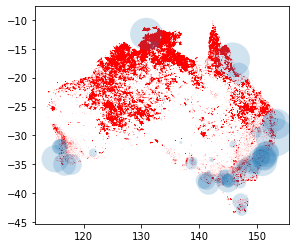

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import math
df3 = pd.read_csv('datasets/stationsCoordinates.csv')


X = df3['Longitude']
Y = df3['Latitude']
cities = df3["City"].tolist()
RainOccurence = np.zeros(len(cities))

for ind in df2.index:
    RainOccurence[cities.index(df2["Location"][ind])] += np.nan_to_num(df2["Rainfall"][ind])

print(RainOccurence)
figure, axes = plt.subplots()

axes.scatter(df1['longitude'],df1['latitude'],c="red",marker = 'o', s=0.000007)
axes.set_aspect(1)

for ind in range(len(cities)):
    print(X[ind])
    draw_circle = plt.Circle((X[ind], Y[ind]),RainOccurence[ind]/1000,alpha=0.4)
    axes.add_artist(draw_circle)

plt.show()